# Concrete Crack Image Detection

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import layers, models

In [2]:
# Create and split the dataset
train_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 40000 files belonging to 2 classes.
Using 32000 files for training.
Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


## Train the Model

### Using MobileNetV2

In [8]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False  # Freeze the base model



9406464/9406464 [==============================] - 22s 2us/step


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
# 3. Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# 4. Model Training
epochs = 5
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=epochs)

Epoch 1/5


1000/1000 [==============================] - 339s 339ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 2/5
1000/1000 [==============================] - 330s 330ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0066 - val_accuracy: 0.9979
Epoch 3/5
1000/1000 [==============================] - 347s 347ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0065 - val_accuracy: 0.9975
Epoch 4/5
1000/1000 [==============================] - 389s 389ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0060 - val_accuracy: 0.9979
Epoch 5/5
1000/1000 [==============================] - 417s 416ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9981


In [15]:
# 5. Model Evaluation
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

250/250 [==============================] - 78s 312ms/step - loss: 0.0057 - accuracy: 0.9981
Validation Accuracy: 99.81%


### Using Custom CNN model

In [3]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

In [4]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

In [5]:
history = model2.fit(
    train_dataset,
    epochs=5,  
    validation_data=validation_dataset
)

Epoch 1/5


1000/1000 [==============================] - 1044s 1s/step - loss: 2.4565 - accuracy: 0.5311 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 2/5
1000/1000 [==============================] - 1655s 2s/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 3/5
1000/1000 [==============================] - 686s 686ms/step - loss: 0.7836 - accuracy: 0.5073 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 4/5
1000/1000 [==============================] - 678s 677ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 5/5
1000/1000 [==============================] - 668s 668ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5100


In [6]:
# 5. Model Evaluation
loss2, accuracy2 = model2.evaluate(validation_dataset)
print(f"Validation Accuracy: {accuracy2*100:.2f}%")

250/250 [==============================] - 50s 197ms/step - loss: 0.6931 - accuracy: 0.5100
Validation Accuracy: 51.00%


## Test the model

In [7]:
img = tf.keras.utils.load_img('data/Negative/00001.jpg', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

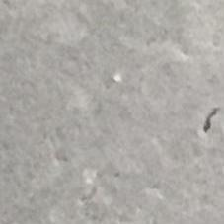

In [30]:
img

In [31]:
img_array

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[178., 175., 170.],
         [173., 170., 165.],
         [166., 163., 158.],
         ...,
         [189., 186., 179.],
         [189., 186., 179.],
         [189., 186., 179.]],

        [[176., 173., 168.],
         [174., 171., 166.],
         [167., 164., 159.],
         ...,
         [185., 182., 175.],
         [185., 182., 175.],
         [185., 182., 175.]],

        [[177., 174., 169.],
         [176., 173., 168.],
         [171., 168., 163.],
         ...,
         [181., 178., 171.],
         [181., 178., 171.],
         [181., 178., 171.]],

        ...,

        [[163., 159., 156.],
         [159., 155., 152.],
         [156., 152., 149.],
         ...,
         [175., 171., 168.],
         [174., 170., 167.],
         [173., 169., 166.]],

        [[165., 161., 158.],
         [161., 157., 154.],
         [157., 153., 150.],
         ...,
         [175., 171., 168.],
         [174., 170., 167.],
         

In [33]:
predictions = model.predict(img_array)
score = predictions[0]
if score>0.5 :
    print("This image is positive.")
else: 
    print("This image is negative.")

1/1 [==============================] - 0s 54ms/step
This image is negative.


In [8]:
predictions = model2.predict(img_array)
score2 = predictions[0]
if score2 >0.5 :
    print("This image is positive.")
else: 
    print("This image is negative.")

1/1 [==============================] - 0s 242ms/step
This image is negative.
